In [ ]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_2014 = pd.read_csv("datagood.csv")
data_2008 = pd.read_csv('datagood2008.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datagood.csv to datagood.csv
Saving datagood2008.csv to datagood2008 (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
d2014 = data_2014.loc[2:].rename(columns={"What year did you begin teaching? (approximate is ok)": "year begin teach", "As a result of CRS support and services (including NewsBlast emails, free BASIS scientist in-class presentations, resource guide mailings, online resources, personalized on-call support, Field Trip for Teacher events, etc.) I was able to:": "increase amount of science teach?",
                             "Unnamed: 3": "how effective science activities engage kids",
                             "Unnamed: 4": "add science lesson lesson/field trip/other for kids",
                             "Unnamed: 5": "incorporate science with art/math",
                             "Unnamed: 6": "become more informed about science resources",
                             "Unnamed: 7": "feel more confident professionally",
                             "Unnamed: 8": "more enthusiastic about science and science teaching",
                             "Unnamed: 9": "know where to find more information about science lession and content",
                             "Unnamed: 10": "know where to ask for resources",
                             "Unnamed: 11": "attend a local science professional development to develop my skills and knowledge",
                             "Did you have a BASIS Scientist Volunteer program in your classroom this year?": "BASIS science volunteer program?",
                             "How many hours of science do you teach per month?" : "science teaching hours per month?",
                             "Do you think this amount of science teaching is ________": "teaching too much/ too little",
                             "I feel my principal supports the importance of science teaching." : "principle supports science teaching?",
                             "My students respond positively to science experiences": "students respond positively to science experiences?"})

In [ ]:
library2014 = {"What year did you begin teaching? (approximate is ok)": "year begin teach", "As a result of CRS support and services (including NewsBlast emails, free BASIS scientist in-class presentations, resource guide mailings, online resources, personalized on-call support, Field Trip for Teacher events, etc.) I was able to:": "increase amount of science teach?",
                             "Unnamed: 3": "how effective science activities engage kids",
                             "Unnamed: 4": "add science lesson lesson/field trip/other for kids",
                             "Unnamed: 5": "incorporate science with art/math",
                             "Unnamed: 6": "become more informed about science resources",
                             "Unnamed: 7": "feel more confident professionally",
                             "Unnamed: 8": "more enthusiastic about science and science teaching",
                             "Unnamed: 9": "know where to find more information about science lession and content",
                             "Unnamed: 10": "know where to ask for resources",
                             "Unnamed: 11": "attend a local science professional development to develop my skills and knowledge",
                             "Did you have a BASIS Scientist Volunteer program in your classroom this year?": "BASIS science volunteer program?",
                             "How many hours of science do you teach per month?" : "science teaching hours per month?",
                             "Do you think this amount of science teaching is ________": "teaching too much/ too little",
                             "I feel my principal supports the importance of science teaching." : "principle supports science teaching?",
                             "My students respond positively to science experiences": "students respond positively to science experiences?"}

In [ ]:
list(library2014.values())

['year begin teach',
 'increase amount of science teach?',
 'how effective science activities engage kids',
 'add science lesson lesson/field trip/other for kids',
 'incorporate science with art/math',
 'become more informed about science resources',
 'feel more confident professionally',
 'more enthusiastic about science and science teaching',
 'know where to find more information about science lession and content',
 'know where to ask for resources',
 'attend a local science professional development to develop my skills and knowledge',
 'BASIS science volunteer program?',
 'science teaching hours per month?',
 'teaching too much/ too little',
 'principle supports science teaching?',
 'students respond positively to science experiences?']

In [ ]:
d2014.shape

(60, 17)

In [ ]:
d2014.head(5)

,DISTRICT,year begin teach,increase amount of science teach?,how effective science activities engage kids,add science lesson lesson/field trip/other for kids,incorporate science with art/math,become more informed about science resources,feel more confident professionally,more enthusiastic about science and science teaching,know where to find more information about science lession and content,know where to ask for resources,attend a local science professional development to develop my skills and knowledge,BASIS science volunteer program?,science teaching hours per month?,teaching too much/ too little,principle supports science teaching?,students respond positively to science experiences?
2,Oakland,I've been teaching for 6 years or more,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes,8 hours or more,too little,Neutral,Agree
3,Oakland,I've been teaching 3-5 years,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,No,8 hours or more,too little,"No, actively (directs staff to spend more time...",Agree
4,West Contra Costa,I've been teaching for 6 years or more,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,No,8 hours or more,too little,"Yes, actively (provides planning time, encoura...",Agree
5,Oakland,I've been teaching for 6 years or more,Yes!,Yes!,Yes!,No impact,Yes!,Yes!,Yes!,Yes!,Yes!,NaN,No,8 hours or more,too little,"Yes, actively (provides planning time, encoura...",Agree
6,Oakland,I've been teaching for 6 years or more,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,No impact,No impact,No impact,Yes,8 hours or more,too little,"Yes, tacitly (not a major focus)",Agree


In [ ]:
for i in np.arange(17):
  print(d2014.iloc[:, i].isna().sum())

0
1
3
3
3
4
3
13
12
12
12
15
2
3
3
3
3


In [ ]:
d2014.iloc[:, 1].unique()


array(["I've been teaching for 6 years or more",
       "I've been teaching 3-5 years", 'This is my first or second year',
       nan], dtype=object)

visualization of 2014-15 data:

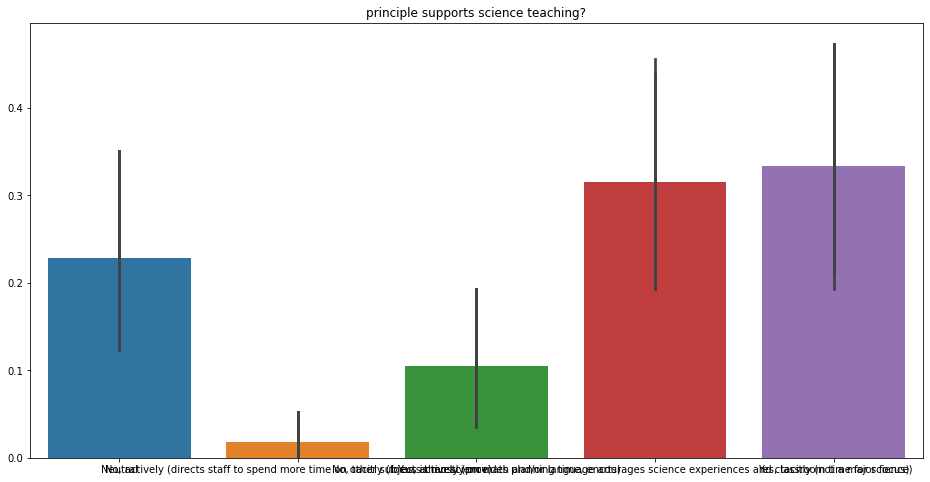

In [ ]:
def see_visualization(data, index):
  data_now = pd.get_dummies(data.iloc[:, index].dropna())
  sns.barplot(data = data_now).set(title=list(library2014.values())[index - 1])
# random_try = pd.get_dummies(data_transformed.iloc[:, 1])
# sns.barplot(data=random_try)
plt.figure(figsize=(16,8))
for i in np.arange(len(d2014.columns) - 1):
  see_visualization(d2014, 15)

overall data for 2014-15 data

In [ ]:
def printout(data, index):
  data_new = data.iloc[:, index]
  data_now = pd.get_dummies(data_new.dropna())
  for i in np.arange(len(data_now.columns)):
    thing = data_now.columns.values[i]
    num = data_now.iloc[:, i].sum() / len(data_now)
    print(thing + ": " + str(num))

# print(list(library.values())[2])
# printout(d2014, 2)

def overall_summary(data, year):
  if year == 2014:
    for i in np.arange(len(data.columns) - 1):
      print("question" + ": " + list(library2014.values())[i])
      printout(data, i + 1)
      print(' ')
  if year == 2008:
    for i in np.arange(len(data.columns)):
      print("question" + ": " + data.columns[i])
      printout(data, i + 1)
      print(' ')


overall_summary(d2014, 2014)

question: year begin teach
I've been teaching 3-5 years: 0.05084745762711865
I've been teaching for 6 years or more: 0.864406779661017
This is my first or second year: 0.0847457627118644
 
question: increase amount of science teach?
No impact: 0.2807017543859649
Yes!: 0.7192982456140351
 
question: how effective science activities engage kids
No impact: 0.22807017543859648
Yes!: 0.7719298245614035
 
question: add science lesson lesson/field trip/other for kids
No impact: 0.15789473684210525
Yes!: 0.8421052631578947
 
question: incorporate science with art/math
No impact: 0.4107142857142857
Yes!: 0.5892857142857143
 
question: become more informed about science resources
No impact: 0.07017543859649122
Yes!: 0.9298245614035088
 
question: feel more confident professionally
No impact: 0.23404255319148937
Yes!: 0.7659574468085106
 
question: more enthusiastic about science and science teaching
No impact: 0.0625
Yes!: 0.9375
 
question: know where to find more information about science less

overall data_analysis 2008

In [ ]:
d2008 = data_2008.drop(0)
# overall_summary(d2008, 2008)
for i in np.arange(len(d2008.columns)):
      print("question" + ": " + d2008.columns[i])
      printout(d2008, i)
      print(' ')

question: District
Berkeley: 0.3958333333333333
Castro Valley: 0.020833333333333332
Informal Science Org: 0.020833333333333332
Oakland: 0.375
Piedmont: 0.020833333333333332
Pleasanton: 0.020833333333333332
Private: 0.0625
San Leandro: 0.0625
West Contra Costa: 0.020833333333333332
 
question: My students respond positively to science experiences.
Somewhat: 0.044444444444444446
Yes: 0.9555555555555556
 
question: I have enough time for the science I want to teach.
No: 0.3409090909090909
Somewhat: 0.4090909090909091
Yes: 0.25
 
question: I have support from my administration to teach hands-on science.
Don't know: 0.022727272727272728
No: 0.09090909090909091
Somewhat: 0.2727272727272727
Yes: 0.6136363636363636
 
question: The availability of CRS support and resources helps me teach science.
No: 0.022222222222222223
Somewhat: 0.08888888888888889
Yes: 0.8888888888888888
 


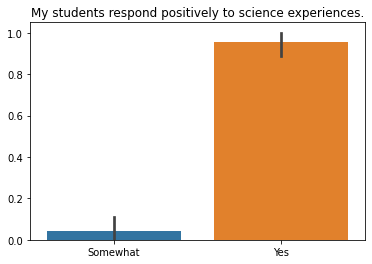

In [ ]:
def see_visualization(data, index):
  data_now = pd.get_dummies(data.iloc[:, index].dropna())
  if index == 15:
    data_now = data_now.rename(columns={'No, actively (directs staff to spend more time on other subjects than science)': 'No, actively',
                      'No, tacitly (focus is mostly on math and/or language arts)': 'No, tacitly',
                      'Yes, actively (provides planning time, encourages science experiences and classroom time for science)' : 'Yes, actively',
                      'Yes, tacitly (not a major focus)': 'Yes, tacitly'} )
  sns.barplot(data = data_now).set(title=data.columns[index])
see_visualization(d2008, 1)

In [ ]:
d2014.head()

,DISTRICT,year begin teach,increase amount of science teach?,how effective science activities engage kids,add science lesson lesson/field trip/other for kids,incorporate science with art/math,become more informed about science resources,feel more confident professionally,more enthusiastic about science and science teaching,know where to find more information about science lession and content,know where to ask for resources,attend a local science professional development to develop my skills and knowledge,BASIS science volunteer program?,science teaching hours per month?,teaching too much/ too little,principle supports science teaching?,students respond positively to science experiences?
2,Oakland,I've been teaching for 6 years or more,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes,8 hours or more,too little,Neutral,Agree
3,Oakland,I've been teaching 3-5 years,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,No,8 hours or more,too little,"No, actively (directs staff to spend more time...",Agree
4,West Contra Costa,I've been teaching for 6 years or more,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,No,8 hours or more,too little,"Yes, actively (provides planning time, encoura...",Agree
5,Oakland,I've been teaching for 6 years or more,Yes!,Yes!,Yes!,No impact,Yes!,Yes!,Yes!,Yes!,Yes!,NaN,No,8 hours or more,too little,"Yes, actively (provides planning time, encoura...",Agree
6,Oakland,I've been teaching for 6 years or more,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,Yes!,No impact,No impact,No impact,Yes,8 hours or more,too little,"Yes, tacitly (not a major focus)",Agree


In [ ]:
d2008.head()

,District,My students respond positively to science experiences.,I have enough time for the science I want to teach.,I have support from my administration to teach hands-on science.,The availability of CRS support and resources helps me teach science.
1,Berkeley,Yes,Somewhat,Yes,Somewhat
2,Berkeley,Yes,No,No,Yes
3,Berkeley,Somewhat,No,Yes,Yes
4,Berkeley,Yes,Somewhat,Yes,Yes
5,Berkeley,Yes,Somewhat,Somewhat,Yes


respond positively 2008 vs 2014:

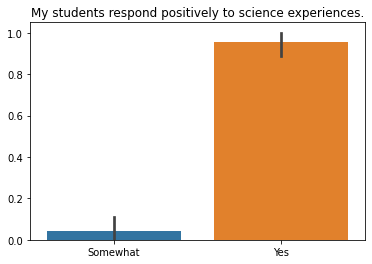

In [ ]:
see_visualization(d2008, 1)

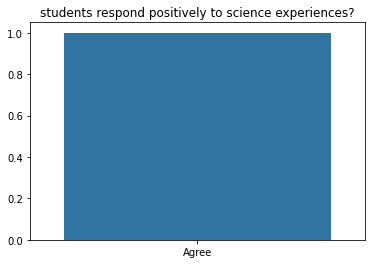

In [ ]:
see_visualization(d2014, 16)

In [ ]:
x1 = (d2014.iloc[:, 16].dropna().value_counts()[0]) / (d2014.iloc[:, 16].dropna().size)
x2 = d2008.iloc[:, 1].dropna().value_counts()[0] / (d2008.iloc[:, 1].dropna().size)
data1 = [x2, x1]
years = []
d1 = {'years': years, 'data': data1}
pda = pd.DataFrame(d1)
sns.lineplot(x='years', y='data', data=pda)

ValueError: ignored

administration support?

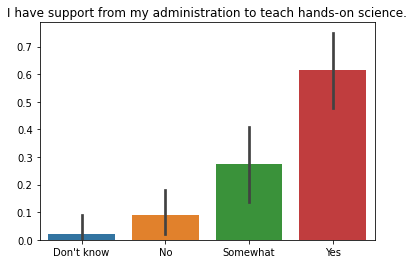

In [ ]:
see_visualization(d2008, 3)

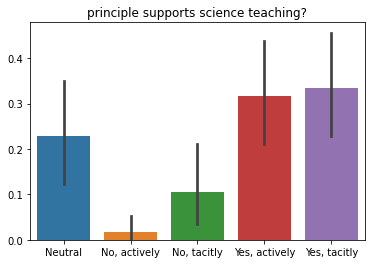

In [ ]:
see_visualization(d2014, 15)

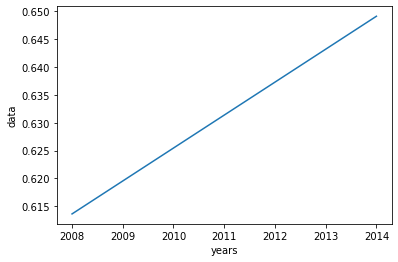

In [ ]:
x11 = (d2014.iloc[:, 15].dropna().value_counts()[0] + d2014.iloc[:, 15].dropna().value_counts()[1]) / (d2014.iloc[:, 15].dropna().size)
x12 = d2008.iloc[:, 3].dropna().value_counts()[0] / (d2008.iloc[:, 3].dropna().size)
data2 = np.array([x12, x11])
years = np.array([2008, 2014])
d2 = {'years': years, 'data': data2}
pdb = pd.DataFrame(d2)
sns.lineplot(x='years', y='data', data=pdb)

about amount of time

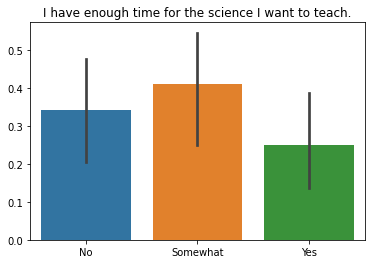

In [ ]:
see_visualization(d2008, 2)

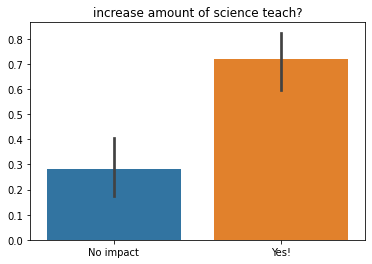

In [ ]:
see_visualization(d2014, 2)

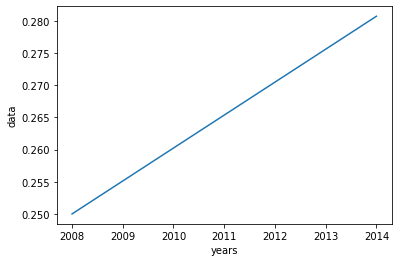

In [ ]:
x21 = (d2014.iloc[:, 2].dropna().value_counts()[1]) / (d2014.iloc[:, 2].dropna().size)
x22 = d2008.iloc[:, 2].dropna().value_counts()[2] / (d2008.iloc[:, 2].dropna().size)
data3 = np.array([x22, x21])
years = np.array([2008, 2014])
d3 = {'years': years, 'data': data3}
pdc = pd.DataFrame(d3)
sns.lineplot(x='years', y='data', data=pdc)

know where to find resources / enough resources

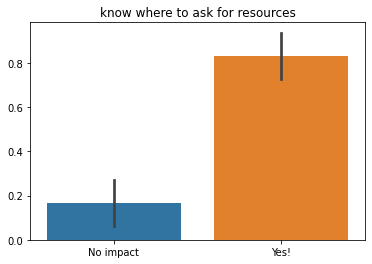

In [ ]:
see_visualization(d2014, 10)

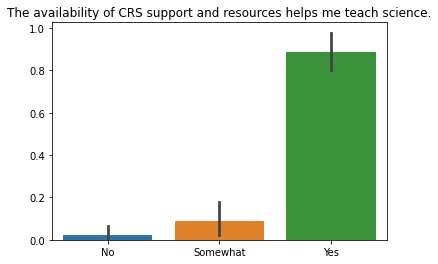

In [ ]:
see_visualization(d2008, 4)

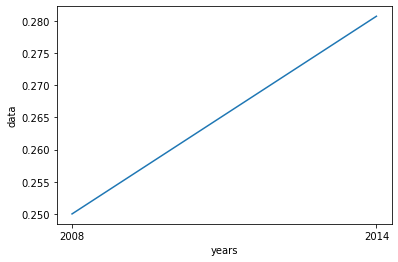

In [ ]:
x31 = (d2014.iloc[:, 10].dropna().value_counts()[0]) / (d2014.iloc[:, 10].dropna().size)
x32 = d2008.iloc[:, 3].dropna().value_counts()[0] / (d2008.iloc[:, 3].dropna().size)
data4 = np.array([x32, x31])
years = np.array([str(2008), str(2014)])
d4 = {'years': years, 'data': data3}
pdd = pd.DataFrame(d4)
sns.lineplot(x='years', y='data', data=pdd)

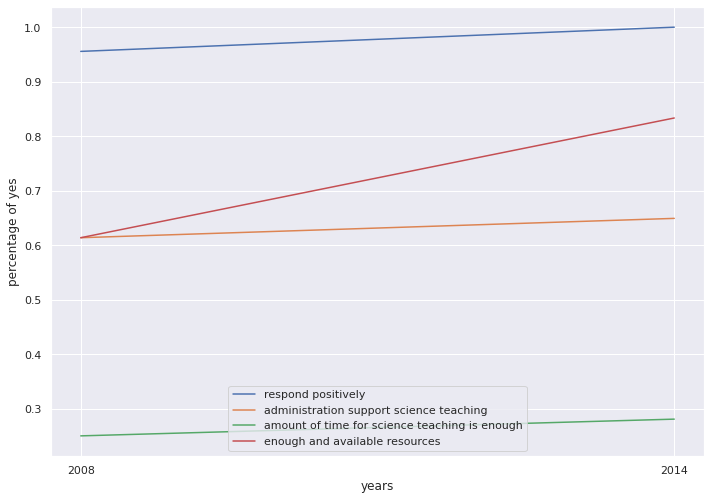

In [ ]:
all_Data = {'years': years, "data1":data1, "data2":data2, "data3":data3, "data4":data4}
all = pd.DataFrame(all_Data)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots()
ax = sns.lineplot(x='years', y='data1', data=all, label = 'respond positively')
ax1 = sns.lineplot(x='years', y='data2', data=all, label = 'administration support science teaching')
ax = sns.lineplot(x='years', y='data3', data=all, label = 'amount of time for science teaching is enough')
ax = sns.lineplot(x='years', y='data4', data=all, label = 'enough and available resources')
plt.ylabel('percentage of yes')
ax.legend()